Aim: To understand the working principle of Artificial Neural network with feed forward and feed backward principle.
Program: Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# Defining some sample input x and output y
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
x_b = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # Defining the input with bias 'b'

In [22]:
# Define the ANN architecture
inp_size = 3  # 3 neurons in the input layer including one for bias
hid_size = 3  # 3 neurons in the hidden layer
out_size = 1  # 1 neuron for output

In [23]:
# Randomly initialize the weight between input and hidden layer for the size of inp_size x hid_size
w1 = np.random.randn(inp_size, hid_size)
# Randomly initialize the weight between hidden and output layer for the size of hid_size x out_size
w2 = np.random.randn(hid_size, out_size)

In [24]:
# Define a sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
# Define the logic of feed forward path
def forward(x, w1, w2):
    z1 = np.dot(x, w1)
    y1 = sigmoid(z1)
    z2 = np.dot(y1, w2)
    out = sigmoid(z2)
    return out, y1

In [26]:
# Define the operations of backward propagation
def backward(x, y, w1, w2, y1, out):
    out_err = y - out
    out_delta = out_err * (out * (1 - out))
    
    y1_err = np.dot(out_delta, w2.T)
    y1_delta = y1_err * (y1 * (1 - y1))
    
    w2 += np.dot(y1.T, out_delta)  # consider alpha=1
    w1 += np.dot(x.T, y1_delta)
    
    return w1, w2

In [27]:
# Train the whole network with forward and backward logic
def train(x, y, w1, w2):
    out, y1 = forward(x, w1, w2)
    w1, w2 = backward(x, y, w1, w2, y1, out)
    return w1, w2, out

In [28]:
# Predict the output for given input by applying trained weights
def predict(x, w1, w2):
    out, _ = forward(x, w1, w2)
    return out

In [29]:
# Training the model with 1000 iterations
loss = np.zeros([1000, 1], dtype=float)
for i in range(1000):
    w1, w2, out = train(x_b, y, w1, w2)
    loss[i] = np.mean(np.square(y - out))

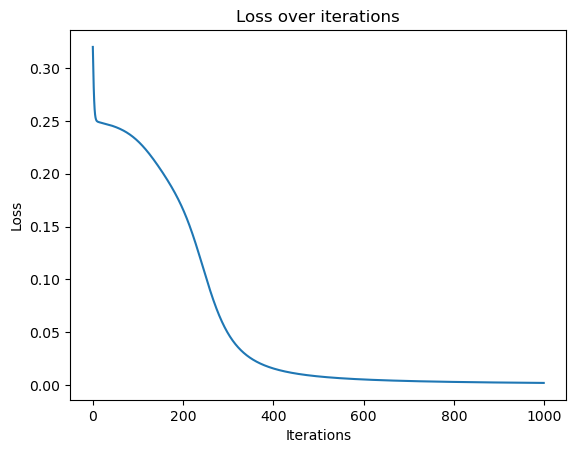

In [30]:
plt.plot(loss)
plt.title('Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [31]:
# Testing the model
tes = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
pred = predict(tes, w1, w2)
print(pred)

[[0.03448091]
 [0.95403897]
 [0.95354878]
 [0.04987638]]
